In [31]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 1.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df= sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
df['species'] = encoder.fit_transform(df['species'])

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df = df[df['species']!=0][['sepal_width','petal_length','species']]

In [16]:
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [18]:
# shuffling the data
df = df.sample(100)

In [19]:
df

,sepal_width,petal_length,species
105,3.0,6.6,2
58,2.9,4.6,1
97,2.9,4.3,1
110,3.2,5.1,2
50,3.2,4.7,1
...,...,...,...
129,3.0,5.8,2
64,2.9,3.6,1
94,2.7,4.2,1
66,3.0,4.5,1


In [20]:
import matplotlib.pyplot as plt

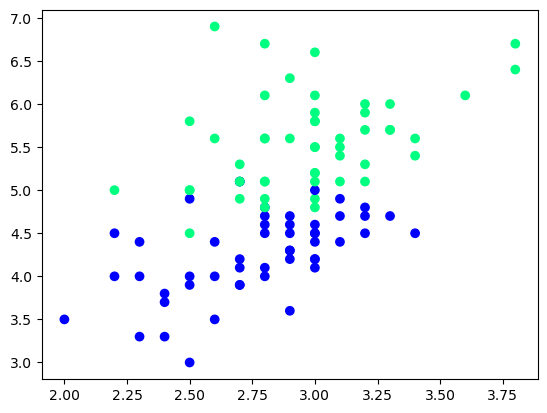

In [23]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [25]:
# generating train, val and test data
df_train= df.iloc[:60,:].sample(10)
df_val= df.iloc[60:80,:].sample(5)
df_test= df.iloc[80:,:].sample(5)

In [28]:
X_test= df_val.iloc[:,:2].values
y_test= df_val.iloc[:,-1].values

# Bagging

In [29]:
df_bag = df_train.sample(8,replace=True)

X= df_bag.iloc[:,:2].values
y= df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
138,3.0,4.8,2
107,2.9,6.3,2
77,3.0,5.0,1
63,2.9,4.7,1
63,2.9,4.7,1
119,2.2,5.0,2
71,2.8,4.0,1
63,2.9,4.7,1


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [33]:
df_bag1 = DecisionTreeClassifier()

In [38]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X,y,clf=clf,legend=2)
    y_pred= clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

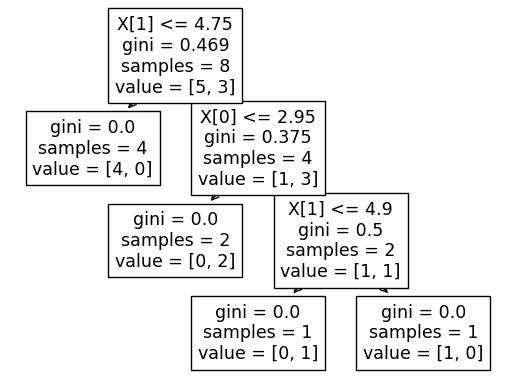

1.0


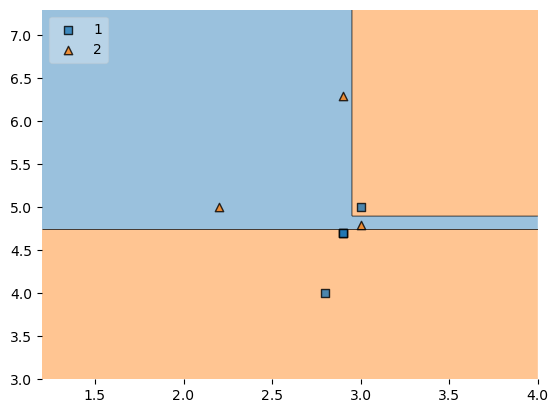

In [39]:
evaluate(df_bag1,X,y)

In [40]:
df_bag = df_train.sample(8,replace=True)

X= df_bag.iloc[:,:2].values
y= df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
89,2.5,4.0,1
144,3.3,5.7,2
71,2.8,4.0,1
144,3.3,5.7,2
135,3.0,6.1,2
138,3.0,4.8,2
119,2.2,5.0,2
58,2.9,4.6,1


In [41]:
df_bag2 = DecisionTreeClassifier()

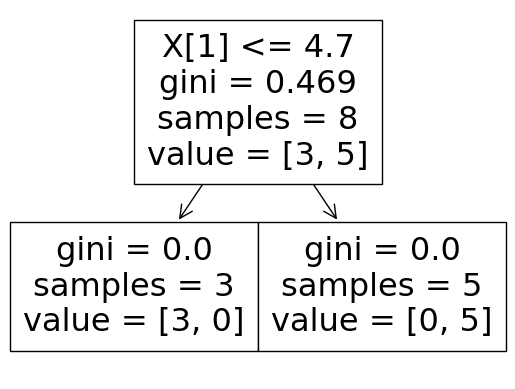

1.0


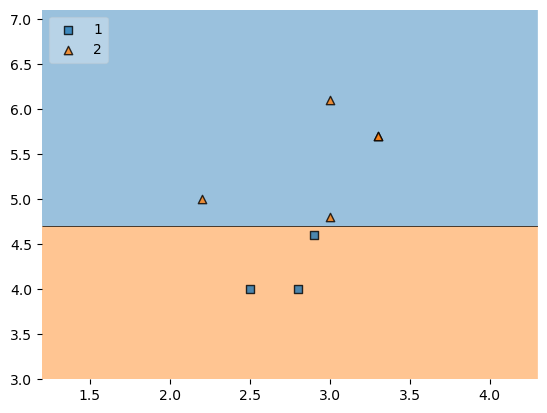

In [42]:
evaluate(df_bag2,X,y)

In [43]:
df_bag = df_train.sample(8,replace=True)

X= df_bag.iloc[:,:2].values
y= df_bag.iloc[:,-1].values

df_bag

,sepal_width,petal_length,species
71,2.8,4.0,1
63,2.9,4.7,1
71,2.8,4.0,1
89,2.5,4.0,1
144,3.3,5.7,2
135,3.0,6.1,2
144,3.3,5.7,2
144,3.3,5.7,2


In [44]:
df_bag3 = DecisionTreeClassifier()

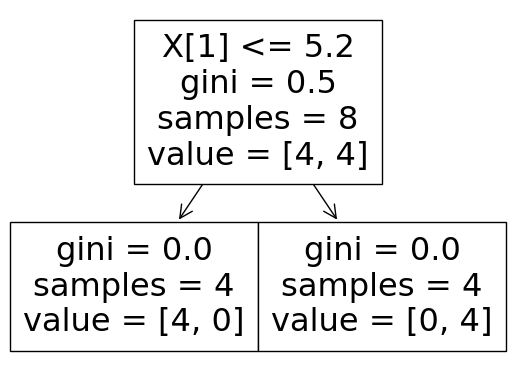

0.8


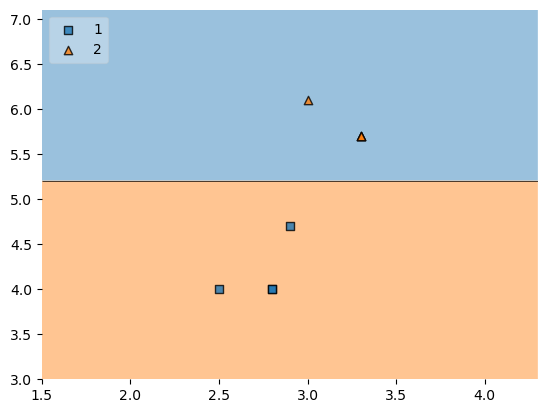

In [45]:
evaluate(df_bag3,X,y)

# Prediction

In [46]:
df_test

,sepal_width,petal_length,species
56,3.3,4.7,1
79,2.6,3.5,1
100,3.3,6.0,2
85,3.4,4.5,1
64,2.9,3.6,1


In [53]:
print('Predictor 1',df_bag1.predict(np.array([3.3,4.7]).reshape(1,2)))
print('Predictor 2',df_bag2.predict(np.array([3.3,4.7]).reshape(1,2)))
print('Predictor 3',df_bag3.predict(np.array([3.3,4.7]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]
